# IRIS FLOWER CLASSIFICATION

### import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-dark-palette')

In [2]:
data = pd.read_csv('../input/iris/Iris.csv')

## Exploratory Data Analysis

In [3]:
# checking the info of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data = data.drop(['Id'], axis=1)

In [5]:
# checking shape of data
data.shape

(150, 5)

Data contains 150 samples and 5 features.
Features are:
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [6]:
# checking for all the null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing value in the data.

In [7]:
# summary statistics of quantitative variables
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Look for the category distribution in categorical columns

In [8]:
data["Species"].value_counts() / len(data)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

Our data is distributed equally. Means each class have equal samples.

### How data is distributed on each feature

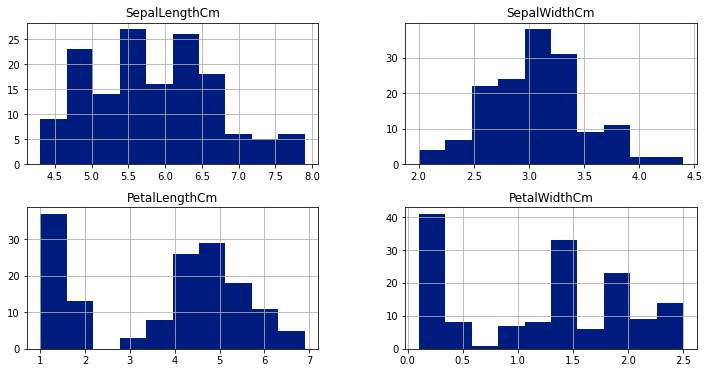

In [9]:
data.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

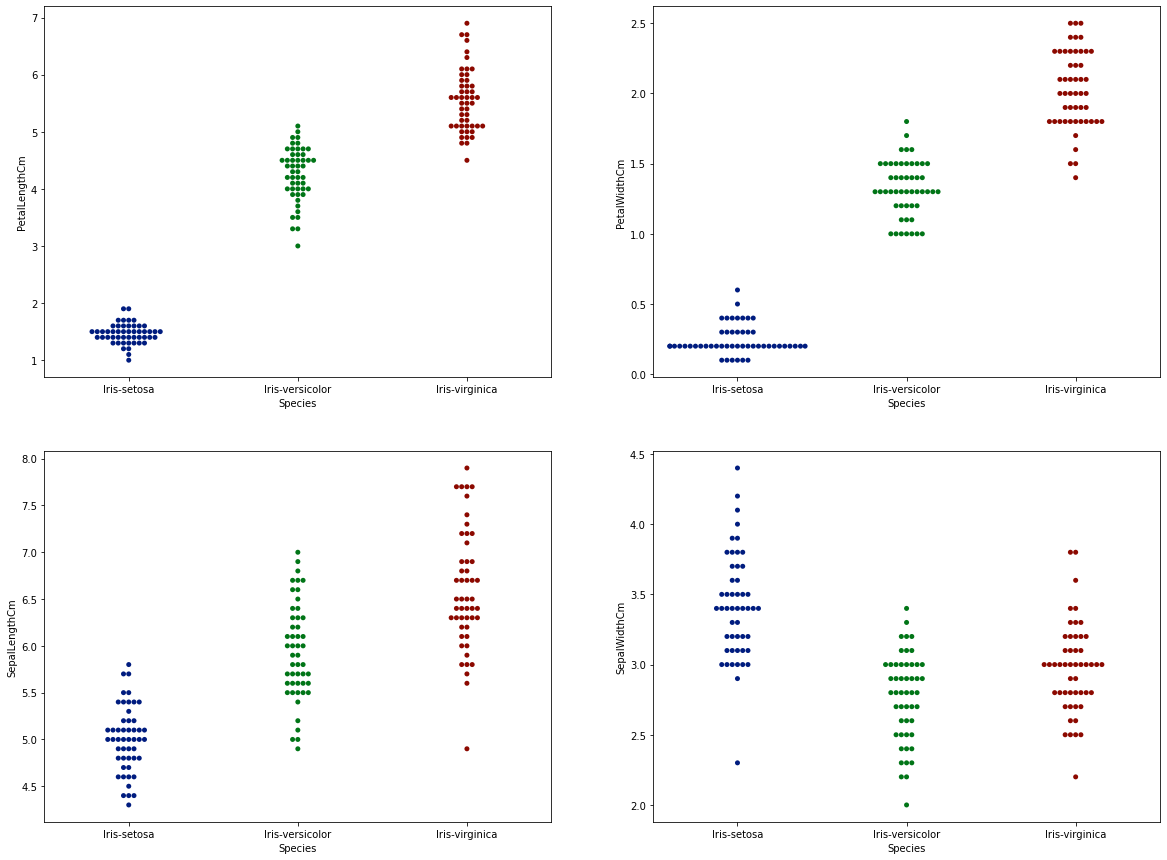

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.swarmplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.swarmplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.swarmplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.swarmplot(x='Species',y='SepalWidthCm',data=data)

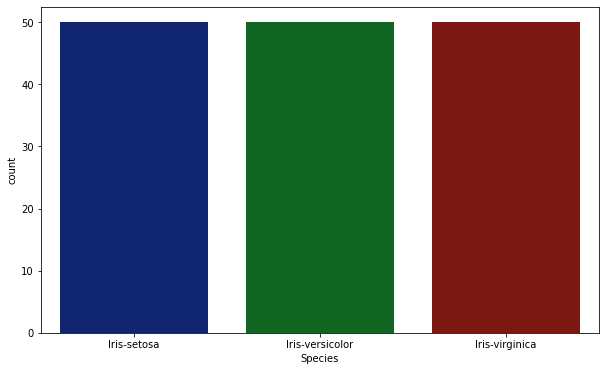

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data.Species)

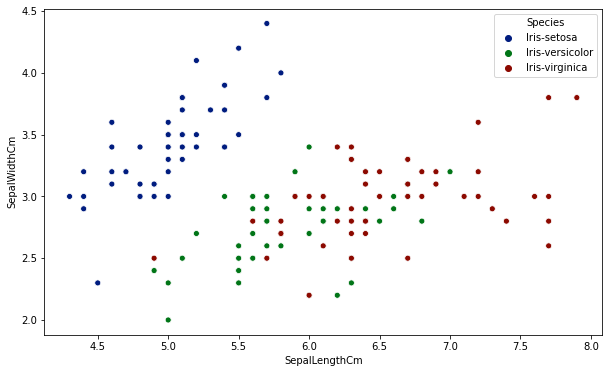

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)

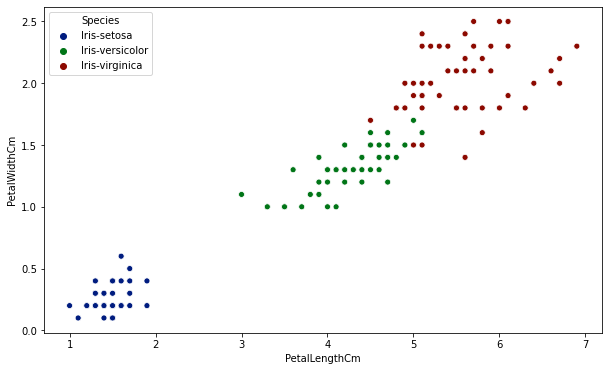

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data)

### Plot for correlation

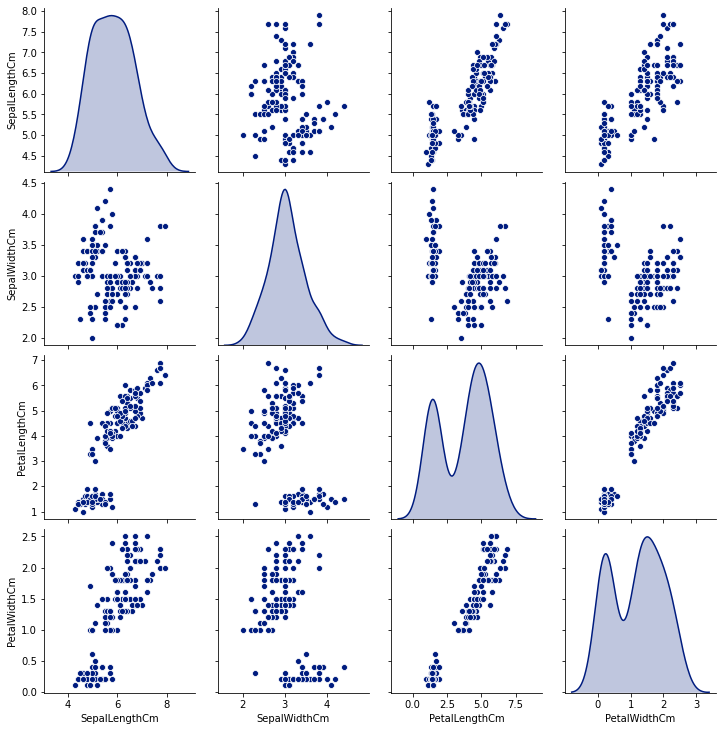

In [14]:
## pairplots to get an intuition of potential correlations
sns.pairplot(data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]], diag_kind="kde")

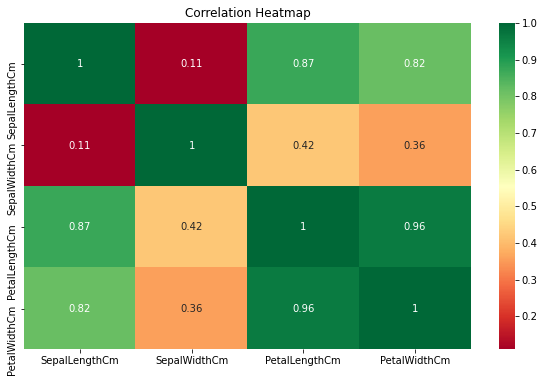

In [15]:
plt.figure(figsize=(10,6))
#draws  heatmap with input as the correlation matrix calculted by(data.corr())
sns.heatmap(data.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

## Split Data in train and test


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Species"]):
    train_set_strat = data.loc[train_index]
    test_set_strat = data.loc[test_index]

In [17]:
##checking category distribution in training set
train_set_strat['Species'].value_counts() / len(train_set_strat)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [18]:
test_set_strat["Species"].value_counts() / len(test_set_strat)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [19]:
train_set_strat_x = train_set_strat.copy().drop(['Species'], axis=1)
train_set_strat_y = train_set_strat['Species']

test_set_strat_x = test_set_strat.copy().drop(['Species'], axis=1)
test_set_strat_y = test_set_strat['Species']

In [20]:
train_set_strat_x.shape, train_set_strat_y.shape, test_set_strat_x.shape, test_set_strat_y.shape

((120, 4), (120,), (30, 4), (30,))

## Selecting and Training Machine Learning Model

In [21]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.model_selection import train_test_split, cross_val_score

# k-nearest neighbor

In [22]:
# Define the range of k values to try
k_values = list(range(1, 31))

# List to store the cross-validation accuracy for each k value
cv_scores = []
# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,train_set_strat_x,train_set_strat_y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal value of k with the highest cross-validation accuracy
optimal_k = k_values[cv_scores.index(max(cv_scores))]

print("Optimal k value:", optimal_k)

Optimal k value: 9


In [23]:
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(train_set_strat_x, train_set_strat_y)
knn_Y_pred = knn.predict(test_set_strat_x)
knn_accuracy=metrics.accuracy_score(test_set_strat_y,knn_Y_pred)*100

print("Accuracy on training dataset : {:.2f}%".format(knn_accuracy) )

Accuracy on training dataset : 96.67%


In [24]:
# getting precision, recall and f1-score via classification report

print(metrics.classification_report(test_set_strat_y, knn_Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Checking Accuracy on Test Data



In [25]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(train_set_strat_x, train_set_strat_y)

y_test_hat = knn.predict(test_set_strat_x) 

test_accuracy=metrics.accuracy_score(test_set_strat_y, y_test_hat) * 100

print("Accuracy on testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy on testing dataset with tuning is : 96.67%


In [26]:
# getting precision, recall and f1-score via classification report

print(metrics.classification_report(test_set_strat_y, y_test_hat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [27]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels from the classifier/model
train_set_strat_pred_y = knn.predict(train_set_strat_x)

# Compute the confusion matrix
confusion_mat = confusion_matrix(train_set_strat_y, train_set_strat_pred_y)

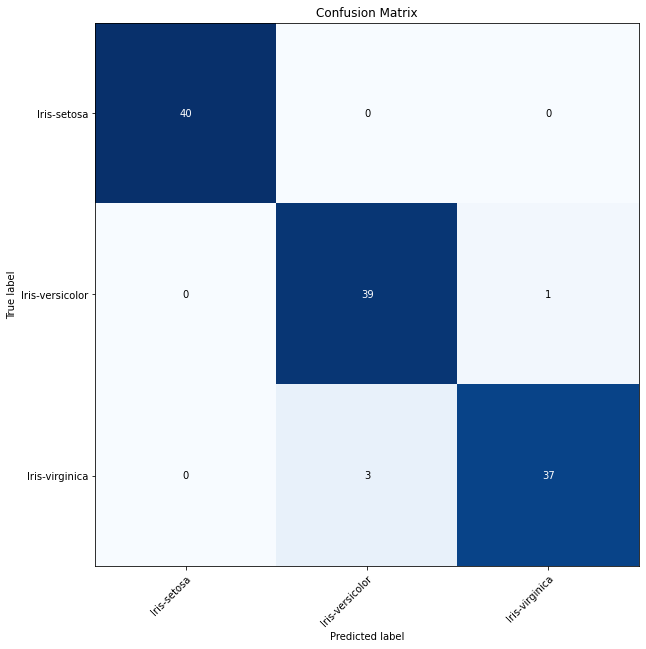

In [28]:
# Plot the confusion matrix
classes = np.unique(train_set_strat_y)  # Assuming your classes are known
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(confusion_mat.shape[1]),
       yticks=np.arange(confusion_mat.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
thresh = confusion_mat.max() / 2
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(j, i, format(confusion_mat[i, j], 'd'),
                ha="center", va="center",
                color="white" if confusion_mat[i, j] > thresh else "black")
plt.show()